In [10]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../..')
import leximin_assignment
import assignment

from tqdm import tqdm

# Individual experiment

In [2]:
N = 5

alphas = np.array([1] * (N // 2) + [i for i in range(1, N - N // 2 + 1)])
betas = np.array([i for i in range(N - N // 2, 0, -1)] + [1] * (N // 2))

means = alphas / (alphas + betas)
_vars = (alphas * betas) / (alphas + betas) ** 2 / (alphas + betas + 1)

In [3]:
cost_matrix = np.array([
    np.sort(np.random.beta(alpha, beta, N))
    for alpha, beta in zip(alphas, betas)
]).T

cost_matrix

array([[0.02040019, 0.07025125, 0.02952397, 0.33125795, 0.71804821],
       [0.08295929, 0.33502881, 0.45133699, 0.78666689, 0.83730339],
       [0.09770901, 0.37004395, 0.46445322, 0.79841623, 0.84677018],
       [0.16355406, 0.60298954, 0.62003262, 0.90568327, 0.88745821],
       [0.30388095, 0.67614865, 0.92053184, 0.9602939 , 0.96256524]])

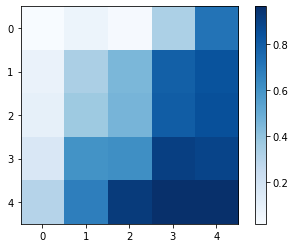

In [4]:
color_map = plt.cm.get_cmap('Blues')

plt.imshow(cost_matrix, cmap=color_map)
plt.colorbar()
plt.show()

In [5]:
eff_assigner = assignment.AssignmentHelperV2(
    cost_matrix, np.ones((N,))
)
assignments = eff_assigner.ip_solve()

print(assignments)
print(eff_assigner.get_cost(assignments))

[3 1 2 0 4]
2.2568592811189983


In [6]:
lex_assigner = leximin_assignment.LeximinAssignmentHelperV3(
    cost_matrix, np.ones((N,))
)
lex_assignments = lex_assigner.solve()

print(lex_assignments)
print(lex_assigner.get_cost(lex_assignments))

[4 3 2 1 0]
2.876038807537373


# Changing `N`

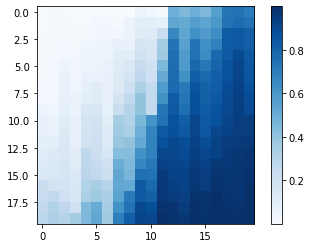

Efficient assignment:
[11 12  9  8 15 13  5  7  4 10 16  1  6  0  3  2 14 17 18 19]
7.895618970534144

Leximin assignment:
[18 17 19 16 14 15 12 13 11 10  9  8  7  4  5  6  1  2  3  0]
9.612896357237085



In [9]:
N = 20

# Generate statistics
alphas = np.array([1] * (N // 2) + [i for i in range(1, N - N // 2 + 1)])
betas = np.array([i for i in range(N - N // 2, 0, -1)] + [1] * (N // 2))

means = alphas / (alphas + betas)
_vars = (alphas * betas) / (alphas + betas) ** 2 / (alphas + betas + 1)

# Generate cost matrix
cost_matrix = np.array([
    np.sort(np.random.beta(alpha, beta, N))
    for alpha, beta in zip(alphas, betas)
]).T

# Draw the heatmap
color_map = plt.cm.get_cmap('Blues')

plt.imshow(cost_matrix, cmap=color_map)
plt.colorbar()
plt.show()

# Efficient assignment
eff_assigner = assignment.AssignmentHelperV2(
    cost_matrix, np.ones((N,))
)
assignments = eff_assigner.ip_solve()

print('Efficient assignment:')
print(assignments)
print(eff_assigner.get_cost(assignments))
print()

# Leximin assignment
lex_assigner = leximin_assignment.LeximinAssignmentHelperV3(
    cost_matrix, np.ones((N,))
)
lex_assignments = lex_assigner.solve()

print('Leximin assignment:')
print(lex_assignments)
print(lex_assigner.get_cost(lex_assignments))
print()

# Repeated experiments

## Distributions of `PoF`

100%|██████████| 100/100 [01:44<00:00,  1.05s/it]


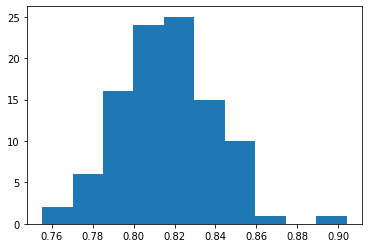

In [11]:
N = 20
NUM_EXPERIMENTS = 100

ratios = []

for _ in tqdm(range(NUM_EXPERIMENTS)):
    # Generate statistics
    alphas = np.array([1] * (N // 2) + [i for i in range(1, N - N // 2 + 1)])
    betas = np.array([i for i in range(N - N // 2, 0, -1)] + [1] * (N // 2))

    means = alphas / (alphas + betas)
    _vars = (alphas * betas) / (alphas + betas) ** 2 / (alphas + betas + 1)

    # Generate cost matrix
    cost_matrix = np.array([
        np.sort(np.random.beta(alpha, beta, N))
        for alpha, beta in zip(alphas, betas)
    ]).T

    # Efficient assignment
    eff_assigner = assignment.AssignmentHelperV2(
        cost_matrix, np.ones((N,))
    )
    assignments = eff_assigner.ip_solve()

    # Leximin assignment
    lex_assigner = leximin_assignment.LeximinAssignmentHelperV3(
        cost_matrix, np.ones((N,))
    )
    lex_assignments = lex_assigner.solve()
    
    ratios.append(lex_assigner.get_cost(lex_assignments) 
                  / eff_assigner.get_cost(assignments))

plt.hist(ratios, bins=15)
plt.show()

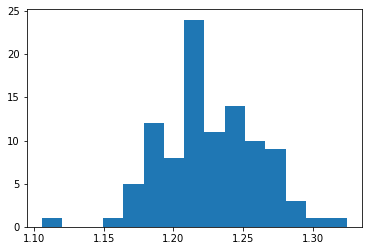

In [14]:
plt.hist([1 / ratio for ratio in ratios], bins=15)
plt.show()

## Cost distributions of `L` (leximin) and `AD` (anti-diagonal)

100%|██████████| 200/200 [03:45<00:00,  1.13s/it]


AttributeError: 'Rectangle' object has no property 'c'

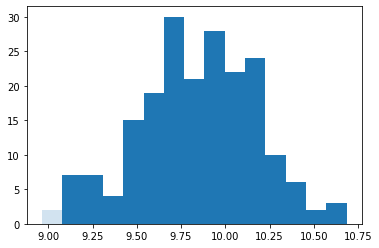

In [18]:
N = 20
NUM_EXPERIMENTS = 200

ad_costs = []
lex_costs = []

for _ in tqdm(range(NUM_EXPERIMENTS)):
    # Generate statistics
    alphas = np.array([1] * (N // 2) + [i for i in range(1, N - N // 2 + 1)])
    betas = np.array([i for i in range(N - N // 2, 0, -1)] + [1] * (N // 2))

    means = alphas / (alphas + betas)
    _vars = (alphas * betas) / (alphas + betas) ** 2 / (alphas + betas + 1)

    # Generate cost matrix
    cost_matrix = np.array([
        np.sort(np.random.beta(alpha, beta, N))
        for alpha, beta in zip(alphas, betas)
    ]).T

    # Leximin assignment
    lex_assigner = leximin_assignment.LeximinAssignmentHelperV3(
        cost_matrix, np.ones((N,))
    )
    lex_assignments = lex_assigner.solve()
    
    lex_costs.append(lex_assigner.get_cost(lex_assignments))
    ad_costs.append(lex_assigner.get_cost(np.arange(N - 1, -1, -1)))

plt.hist(lex_costs, alpha=0.2, color='blue', bins=15)
plt.hist(ad_costs, alpha=0.2, color='red', bins=15)

plt.axvline(np.mean(lex_costs), c='blue')
plt.axvline(np.mean(ad_costs), c='red')

plt.show()

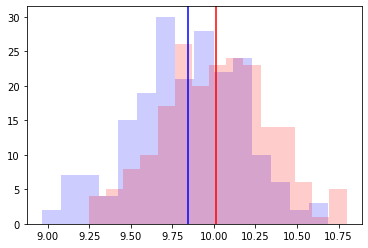

In [19]:
plt.hist(lex_costs, alpha=0.2, color='blue', bins=15)
plt.hist(ad_costs, alpha=0.2, color='red', bins=15)

plt.axvline(np.mean(lex_costs), c='blue')
plt.axvline(np.mean(ad_costs), c='red')

plt.show()